In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
MAX_FORECAST = 12

In [3]:
c = 4  # num clients
rounds_participated = np.array([15, 13, 19, 11])

# First element in this array descibes "now"
forecasts = np.array([[500, 510, 530, 480, 470, 440, 480, 500, 510, 490, 480, 470, 470],
                      [30, 35, 34, 32, 30, 29, 28, 27, 28, 27, 30, 32, 35],
                      [610, 570, 560, 550, 580, 600, 620, 630, 630, 620, 630, 620, 600],
                      [300, 350, 390, 380, 320, 280, 240, 200, 180, 170, 180, 160, 120]])

In [11]:
# based on `rounds_participated`, calculate the forecast window for each client
# clients with less participation have a shorter window to be forced to participate soon
windows = np.rint((2 * rounds_participated / rounds_participated.max() - 1) * MAX_FORECAST).astype(int)
windows

array([ 7,  4, 12,  2])

In [14]:
def lowest_delta(forecast, window):
    """Returns the lowest delta of and forecasted value compared to 'now'"""
    min_delta = (forecast[1:window + 1] - forecast[0]).min()
    print(forecast[0], forecast[1:window + 1], min_delta)
    return min_delta

# idea: Optimize for clients that have the least absolute potential to improve their carbon intensity within their forecast window
# For each round, the n clients with highest value should be selected
scores = np.argsort([lowest_delta(forecasts[i], windows[i]) for i in range(c)])
scores

500 [510 530 480 470 440 480 500] -60
30 [35 34 32 30] 0
610 [570 560 550 580 600 620 630 630 620 630 620 600] -60
300 [350 390] 50


array([0, 2, 1, 3])

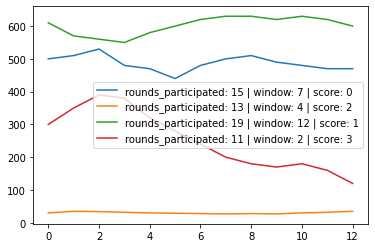

In [18]:
fig, ax1 = plt.subplots()
for forecast, r, window, score in zip(forecasts, rounds_participated, windows, scores):
    ax1.plot(range(MAX_FORECAST+1), forecast, label=f"rounds_participated: {r} | window: {window} | score: {score}")
ax1.legend()